<a href="https://colab.research.google.com/github/Ru1chi/sample/blob/main/model_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import seaborn as sns



In [3]:
# Load the dataset
df = pd.read_excel('/content/recipees.xlsx')



df



,recipe_name,ingredients,calories,protein,carbs,fat,price($),category
0,Caesar Salad,"Romaine Lettuce, Croutons, Parmesan",180,7,8,12,4.5,vegetarian
1,Margarita Pizza,"Dough, Tomato Sauce, Mozzarella",300,15,40,10,8.0,vegetarian
2,Vegetable Lasagna,"Zucchini, Tomato Sauce, Ricotta",350,20,45,15,6.5,vegetarian
3,BBQ Chicken Wings,"Chicken, BBQ Sauce, Spices",400,25,10,20,9.0,chicken
4,Fruit Smoothie,"Banana, Strawberry, Yogurt",150,4,30,2,3.0,vegan
...,...,...,...,...,...,...,...,...
95,Mango Sorbet,"Mango, Sugar, Water",150,1,35,0,3.0,vegan
96,Peanut Butter Sandwich,"Peanut Butter, Bread, Honey",300,10,30,15,2.5,vegetarian
97,Tofu Salad,"Tofu, Lettuce, Tomato",200,10,10,10,4.0,vegan
98,Grilled Shrimp,"Shrimp, Olive Oil, Lemon",200,20,0,10,6.0,fish


In [4]:
df.describe()

df.shape



(100, 8)

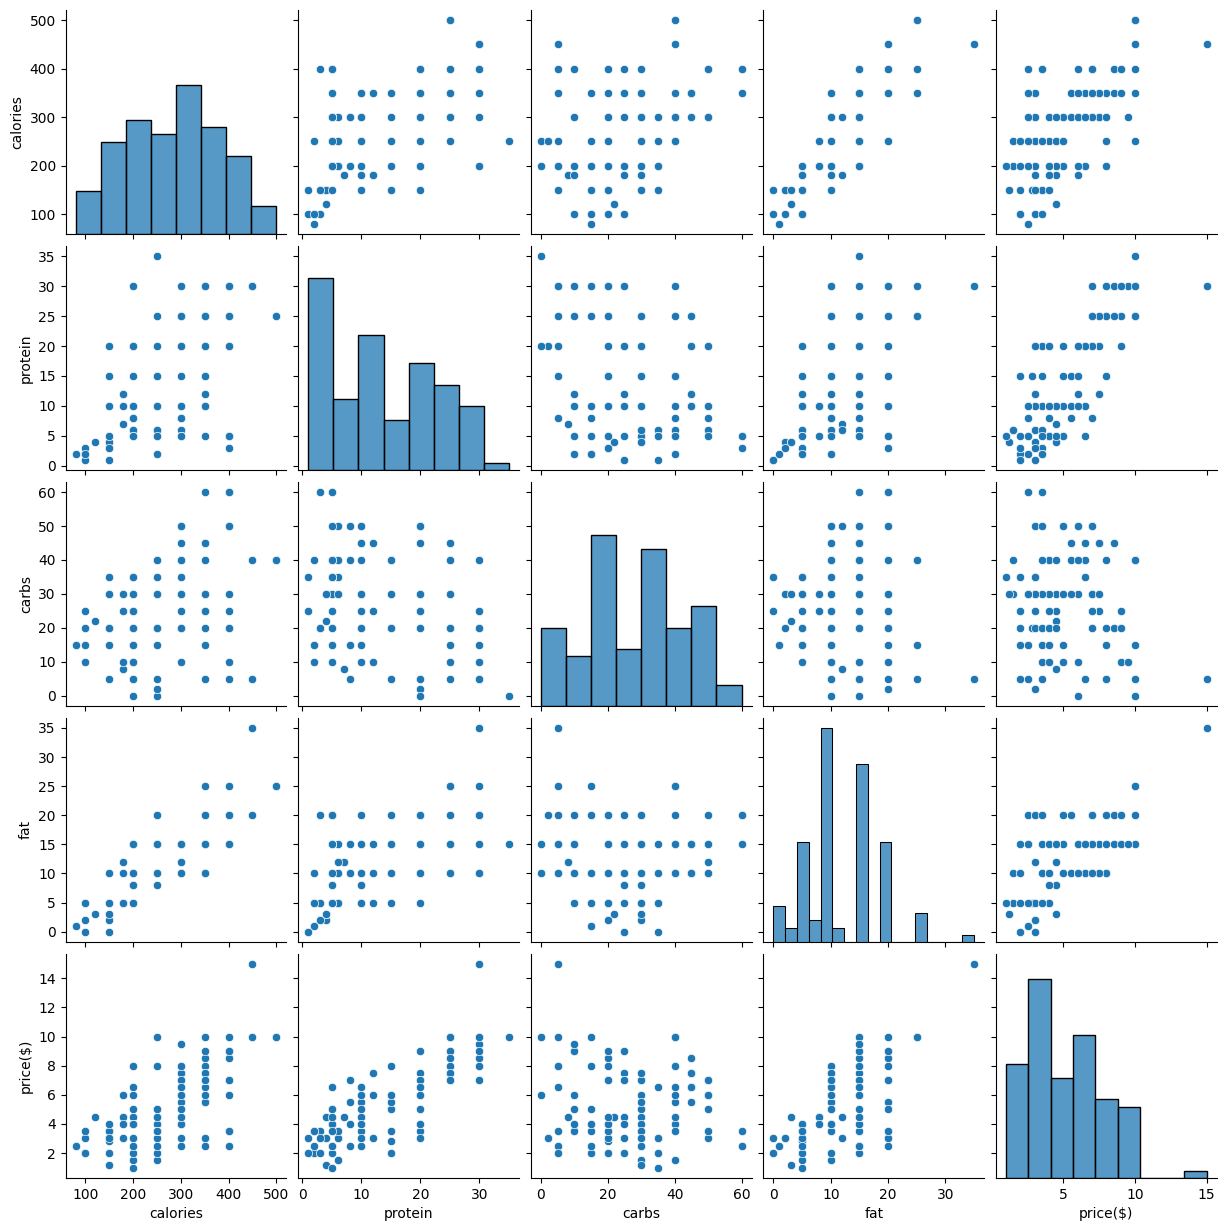

In [5]:
sns.pairplot(df[['calories', 'protein', 'carbs', 'fat', 'price($)']])



<Axes: >

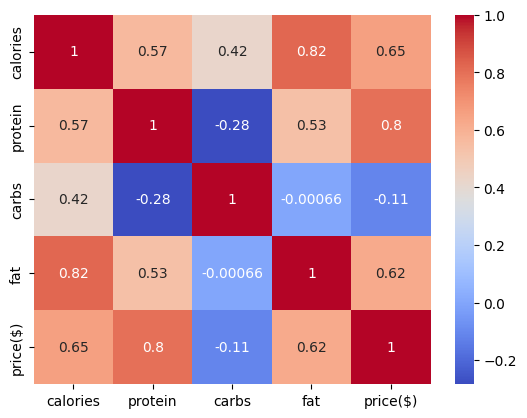

In [6]:
import numpy as np

#Correlation Matrix
sns.heatmap(df[['calories', 'protein', 'carbs', 'fat', 'price($)']].corr(), annot=True, cmap='coolwarm')




In [7]:
# Features for clustering
X = df[['calories', 'protein', 'carbs', 'fat', 'price($)']]



X.shape




(100, 5)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





In [9]:
X_scaled


array([[-0.97670588, -0.74294932, -1.31262359, -0.03024117, -0.30374665],
       [ 0.29449483,  0.13239598,  0.86149416, -0.34856927,  1.05053778],
       [ 0.82416179,  0.67948679,  1.20120005,  0.44725098,  0.47013017],
       [ 1.35382875,  1.2265776 , -1.17674123,  1.24307123,  1.43747618],
       [-1.29450605, -1.07120381,  0.18208236, -1.62188167, -0.88415426],
       [ 0.29449483,  0.67948679, -0.15762354, -0.34856927,  0.85706857],
       [-0.76483909, -0.96178565, -0.49732943, -0.34856927, -0.49721585],
       [ 1.35382875, -0.96178565,  2.22031775,  1.24307123, -1.07762346],
       [ 1.88349571,  1.77366842,  0.86149416,  1.24307123,  1.82441459],
       [-0.76483909, -0.96178565, -1.17674123,  0.44725098, -0.11027745],
       [ 0.29449483, -0.41469484,  1.54090595, -0.34856927,  0.27666096],
       [ 0.82416179,  1.77366842, -1.51644713,  1.24307123,  1.05053778],
       [ 1.35382875,  0.67948679, -0.15762354,  1.24307123,  0.66359937],
       [-1.29450605, -1.18062198, -0.4

In [46]:
# Save the model and scaler to .sav files
with open('kmeans_model11.sav', 'wb') as model_file:
    pickle.dump(kmeans, model_file)
with open('scaler_model11.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")




Model and scaler saved successfully.


In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:

# Preprocess the ingredients
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))



In [18]:
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)



In [19]:
df['cleaned_ingredients'] = df['ingredients'].apply(preprocess)



In [20]:
df.cleaned_ingredients


0     romaine lettuce crouton parmesan
1        dough tomato sauce mozzarella
2        zucchini tomato sauce ricotta
3              chicken bbq sauce spice
4             banana strawberry yogurt
                    ...               
95                   mango sugar water
96           peanut butter bread honey
97                 tofu lettuce tomato
98              shrimp olive oil lemon
99                 flour custard berry
Name: cleaned_ingredients, Length: 100, dtype: object

In [21]:
# Convert text to numeric format
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_ingredients'])

In [44]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X.toarray())

In [24]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

In [25]:
# Add clustering results to DataFrame
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [26]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

In [27]:
df['PCA1'] = reduced_X[:, 0]
df['PCA2'] = reduced_X[:, 1]

In [28]:
# Visualize Clusters
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

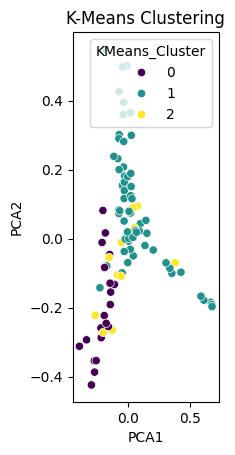

In [29]:
# K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

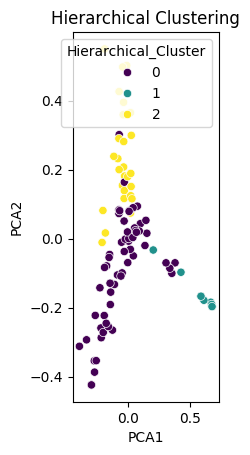

In [30]:
# Hierarchical
plt.subplot(1, 3, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')

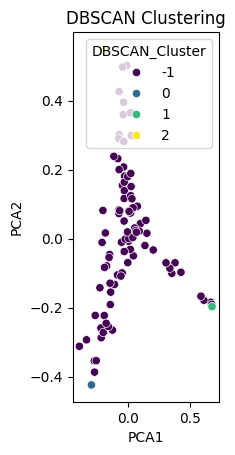

In [33]:
# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [35]:
df


,recipe_name,ingredients,calories,protein,carbs,fat,price($),category,cleaned_ingredients,cluster,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster,PCA1,PCA2
0,Caesar Salad,"Romaine Lettuce, Croutons, Parmesan",180,7,8,12,4.5,vegetarian,romaine lettuce crouton parmesan,1,1,0,-1,-0.072448,0.072988
1,Margarita Pizza,"Dough, Tomato Sauce, Mozzarella",300,15,40,10,8.0,vegetarian,dough tomato sauce mozzarella,0,0,0,0,-0.294621,-0.423840
2,Vegetable Lasagna,"Zucchini, Tomato Sauce, Ricotta",350,20,45,15,6.5,vegetarian,zucchini tomato sauce ricotta,0,0,0,-1,-0.215738,-0.287035
3,BBQ Chicken Wings,"Chicken, BBQ Sauce, Spices",400,25,10,20,9.0,chicken,chicken bbq sauce spice,1,1,0,-1,-0.171766,-0.078892
4,Fruit Smoothie,"Banana, Strawberry, Yogurt",150,4,30,2,3.0,vegan,banana strawberry yogurt,1,1,0,-1,0.137496,-0.019740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mango Sorbet,"Mango, Sugar, Water",150,1,35,0,3.0,vegan,mango sugar water,1,1,0,-1,0.338300,-0.085773
96,Peanut Butter Sandwich,"Peanut Butter, Bread, Honey",300,10,30,15,2.5,vegetarian,peanut butter bread honey,1,1,2,-1,0.020632,0.365303
97,Tofu Salad,"Tofu, Lettuce, Tomato",200,10,10,10,4.0,vegan,tofu lettuce tomato,0,0,2,-1,-0.208642,-0.010840
98,Grilled Shrimp,"Shrimp, Olive Oil, Lemon",200,20,0,10,6.0,fish,shrimp olive oil lemon,1,1,2,-1,0.023198,0.189204


In [36]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
# Assuming you have your cluster labels for each model
kmeans_labels = df['KMeans_Cluster']
hierarchical_labels = df['Hierarchical_Cluster']
dbscan_labels = df['DBSCAN_Cluster']



In [40]:
# Calculate Silhouette Score
silhouette_kmeans = silhouette_score(df[['PCA1', 'PCA2']], kmeans_labels)
silhouette_hierarchical = silhouette_score(df[['PCA1', 'PCA2']], hierarchical_labels)
silhouette_dbscan = silhouette_score(df[['PCA1', 'PCA2']], dbscan_labels)



In [41]:
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")



K-Means Silhouette Score: 0.05246120298339202
Hierarchical Silhouette Score: 0.3132003337540124
DBSCAN Silhouette Score: 0.11098020846274859


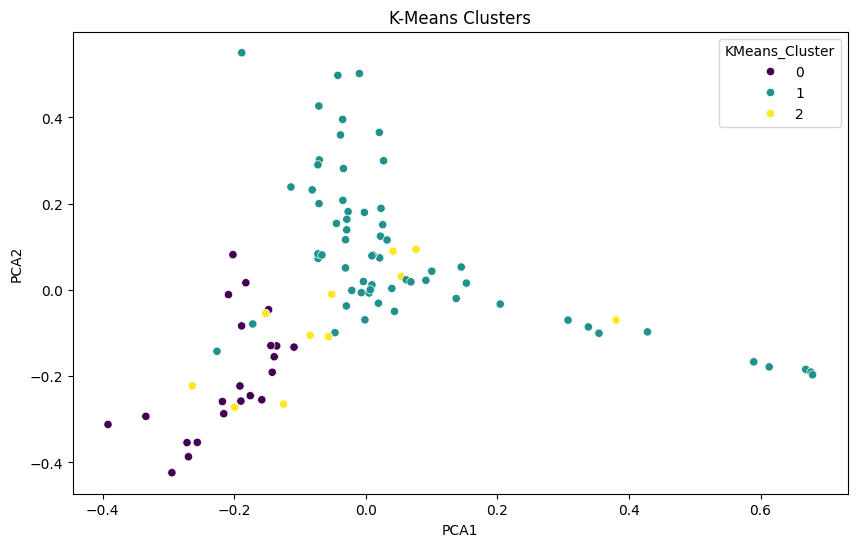

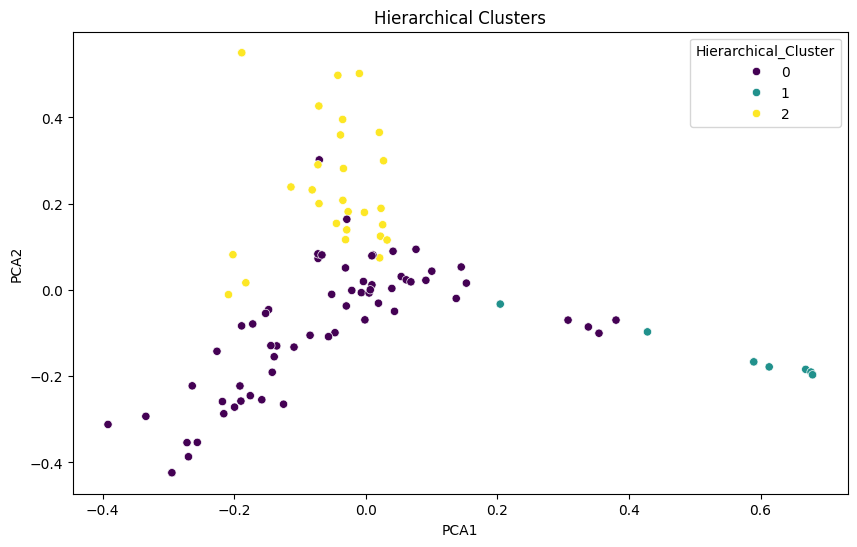

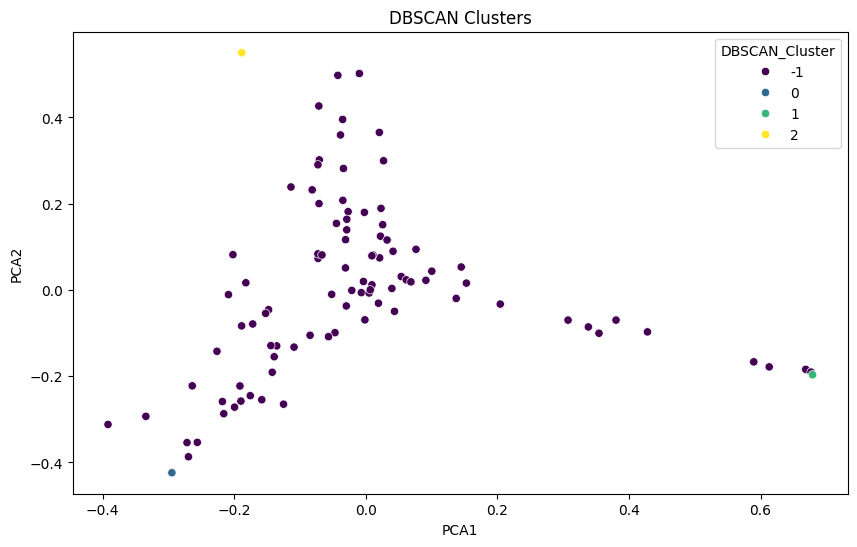

In [43]:
# Visualize Clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=labels, palette='viridis', data=data)
    plt.title(title)
    plt.show()

plot_clusters(df, kmeans_labels, 'K-Means Clusters')
plot_clusters(df, hierarchical_labels, 'Hierarchical Clusters')
plot_clusters(df, dbscan_labels, 'DBSCAN Clusters')
